In [1]:
import os
import re
import json
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
%matplotlib inline

from plotting import make_all_mol_list, make_small_mol_list, overlay_plot, average_plot
from molecule_rot import MoleculeRot

## Establish file paths and list of all molecule objects. Run before making any plots. 

In [2]:
home = os.path.abspath('/mnt/research/RotateDiheds/data')
master_dir = os.path.join(home,'masters/')
plot_dir = os.path.join(home, 'plots/')

all_molecules = make_all_mol_list(master_dir)
print("Done making all_molecules list.")  


Done making all_molecules list.


{0.0: -8.226278334000002, 20.0: -8.325055716, 30.0: -8.589550524, 40.0: -8.695674984, 50.0: -8.841255974, 60.0: -8.783567806, 80.0: -9.070375962, 110.0: -8.899216256, 160.0: -8.308456762, 170.0: -8.23825135, 180.0: -8.226278334000002}


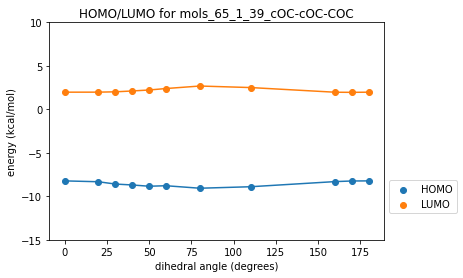

In [3]:
mol = all_molecules[34]
mol.plot_homo_lumo()
print(mol.homo_dict)

## Make plot for each unit of each polymer

In [4]:
out_dir = os.path.join(plot_dir,'homo_lumo/')
    
for mol in all_molecules:
    try: 
        mol.plot_homo_lumo(out_dir)
    #     mol.write_nnff_json(os.path.join(home,'jsons/'))
        print('Done plotting {}'.format(mol.name))
    except:
        print("Error plotting {}".format(mol))

Done plotting mols_66_1_08_n-n-c-cOC
Done plotting mols_65_5_16_n-n-C
Done plotting mols_65_1_22_n-cF-CF
Done plotting mols_65_3_27_n-cOC-COC
Done plotting mols_66_1_09_c-c-cF-cF
Done plotting mols_65_5_01_c-c-N
Done plotting mols_65_5_14_c-cOC-CF
Done plotting mols_66_7_17_n-n-cOC-cOC
Done plotting mols_65_1_27_n-cOC-COC
Done plotting mols_66_7_13_c-n-cF-cOC
Done plotting mols_66_7_01_c-n-c-c
Done plotting mols_65_1_12_c-cOC-C
Done plotting mols_65_1_13_c-cOC-N
Done plotting mols_65_7_07_c-n-COC
Done plotting mols_65_5_13_c-cOC-N
Done plotting mols_65_3_11_c-cF-COC
Done plotting mols_66_3_16_c-n-cOC-cOC
Done plotting mols_65_5_31_cF-cF-COC
Done plotting mols_65_7_04_c-n-C
Done plotting mols_66_7_09_c-c-cF-cF
Done plotting mols_66_3_17_n-n-cOC-cOC
Done plotting mols_65_5_04_c-n-C
Done plotting mols_65_7_25_n-cOC-N
Done plotting mols_55_1_01_C-CF
Done plotting mols_66_1_06_c-c-c-cOC
Done plotting mols_55_5_00_C-C
Done plotting mols_66_7_11_n-n-cF-cF
Done plotting mols_65_7_19_n-n-COC
Do

Done plotting mols_65_1_09_c-cF-N
Done plotting mols_65_3_24_n-cOC-C
Done plotting mols_65_3_21_n-cF-N
Done plotting mols_66_5_05_n-n-c-cF
Done plotting mols_65_3_13_c-cOC-N
Done plotting mols_65_7_00_c-c-C
Done plotting mols_66_3_15_c-c-cOC-cOC
Done plotting mols_65_3_12_c-cOC-C
Done plotting mols_65_7_20_n-cF-C
Done plotting mols_65_3_33_cF-cOC-N
Done plotting mols_65_3_19_n-n-COC
Done plotting mols_55_3_06_CF-COC
Done plotting mols_66_5_11_n-n-cF-cF
Done plotting mols_65_5_35_cF-cOC-COC
Done plotting mols_66_5_12_c-c-cF-cOC
Done plotting mols_65_7_37_cOC-cOC-N
Done plotting mols_65_5_03_c-c-COC
Done plotting mols_66_5_10_c-n-cF-cF
Done plotting mols_65_1_06_c-n-CF
Done plotting mols_66_3_08_n-n-c-cOC
Done plotting mols_55_3_08_N-COC
Done plotting mols_65_5_07_c-n-COC
Done plotting mols_65_5_02_c-c-CF
Done plotting mols_55_1_08_N-COC
Done plotting mols_65_1_29_cF-cF-N
Done plotting mols_65_1_04_c-n-C
Done plotting mols_65_3_15_c-cOC-COC
Done plotting mols_65_3_34_cF-cOC-CF
Done plott

## Make overlay plot for each polymer

In [4]:
out_dir = os.path.join(plot_dir,'overlay/')
ring_type = [55,65,66]
for r in ring_type:
    i = 0
    while i <= 40:
        unit_overlay_list = make_small_mol_list(all_molecules,ring_num=r, polymer_num=i)
        try: 
            first_mol = unit_overlay_list[0]
            mol_name = "mol_{}__{}_{}".format(first_mol.ring_num, first_mol.polymer_num,first_mol.substituents)
            overlay_plot(unit_overlay_list,mol_name,out_dir,draw_1unit=True)
            print('Done plotting overlay for {}'.format(mol_name))
            i += 1
        except IndexError:
            break 
        except: 
            i += 1
            print('Error plotting overlay for {} rings and {} polymer number'.format(r,i))

TypeError: expected string or bytes-like object

## Make average plots for each unit size

In [ ]:
out_dir = os.path.join(plot_dir,'other/')
unit_nums = [1,3,5,7]
for u in unit_nums:
#     try:
    unit_list = make_small_mol_list(all_molecules,unit_num=u)
    average_plot(unit_list, str(u)+'_subunits', out_dir)
    overlay_plot(unit_list,str(u)+'_subunits',out_dir,legend_outside=False)
    print('Done plotting average energies for {} units'.format(u))
#     except:
#         print('Error plotting average energies for {} units'.format(u))

# Specific plots
Make plots comparing molecules with the same cromophore ring structure

In [ ]:
out_dir = os.path.join(plot_dir,'other/')
ring_numbers = [55,65,66]
for ring in ring_numbers: 
    ring_overlay_list = make_small_mol_list(all_molecules,ring_num=ring)
    overlay_plot(ring_overlay_list,'ring{}_plt'.format(ring),out_dir,varying_atrib='substituents')
    average_plot(ring_overlay_list,'ring{}_plt'.format(ring),out_dir)


Make plots comaring molecules with the same substituents

In [ ]:
out_dir = os.path.join(plot_dir,'other/')
all_substituents = set(())
print(all_substituents)
for mol in all_molecules: 
    all_substituents.add(mol.substituents)
for sub in all_substituents: 
    sub_overlay_list = make_small_mol_list(all_molecules,substituents=sub)
#     overlay_plot(sub_overlay_list,'{}_plt'.format(sub),os.path.join(out_dir,'substituents/'),varying_atrib='name')
    average_plot(sub_overlay_list,'{}_plt'.format(sub),os.path.join(out_dir,'substituents/'))